## Gender Pay Gap in the UK

### Business Understanding

In the UK, employers with 250 or more employees are required to calculate a series of metrics about their gender pay gap and publish them in a yearly report.

This [data](https://gender-pay-gap.service.gov.uk/) is publicly available. In this notebook the reports from 2018/19 will be analyzed since the last complete dataset available.

**Investigation 
Questions:**
1. How balanced is payment amounts by gender?
2. Which are economic sectors with most and less gender pay gap?
3. Which employer features explain the gender pay gap?
4. Something related with Mean and Median.
4. Something related with Representation.

### Data Understanding

Companies must report the following gender pay gap figures, calculation details can be found [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations).


| Figure                                                    | Columns                                                                                  |
|:-----------------------------------------------------------|:------------------------------------------------------------------------------------------|
| Mean gender pay gap in hourly pay                         | `DiffMeanHourlyPercent`                                                                    |
| Median gender pay gap in hourly pay                       | `DiffMedianHourlyPercent`                                                                  |
| Mean bonus gender pay gap                                 | `DiffMeanBonusPercent`                                                                     |
| Median bonus gender pay gap                               | `DiffMedianBonusPercent`                                                                   |
| Proportion of males and females receiving a bonus payment |  `(M/F)BonusPercent`                                                                |
| Proportion of males and females in each pay quartile      | `(M/F)LowQuartile, (M/F)LowerMiddleQuartile, (M/F)UpperMiddleQuartile, (M/FUpperQuartile)` |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.family"] = "serif"

In [2]:
raw = pd.read_csv("data/UK-Gender-Pay-Gap-Data-2018-2019.csv")
rows, cols = raw.shape
print(rows, "x", cols)
raw.columns

10828 x 25


Index(['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
       'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
       'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent',
       'FemaleBonusPercent', 'MaleLowerQuartile', 'FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile', 'CompanyLinkToGPGInfo',
       'ResponsiblePerson', 'EmployerSize', 'CurrentName',
       'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted'],
      dtype='object')

Apart from gender pay gap figures, the dataset includes company information such as name, size (`EmployerSize`), the industry sectors they belong to (`SicCodes`) and a URL to their writtern report (`CompanyLinkToGPGInfo`). Submission metadata is included too.

In [3]:
columns = raw.columns
non_numeric_cols = ['EmployerName', 'Address', 'CompanyNumber', 'SicCodes',
                    'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'EmployerSize',
                    'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate', 'DateSubmitted']
raw[non_numeric_cols].describe()

,EmployerName,Address,CompanyNumber,SicCodes,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
count,10828,10828,9486,10328,7433,9136,10828,10828,10828,10828,10828
unique,10828,9564,9486,2004,6258,7515,7,10827,2,2,10706
top,Tesco Personal Finance PLC,"30 Berners Street, London, England, W1T 3LR",00550055,82990,https://www.capita.com/media/3760/gender-pay-g...,Will Serle (Chief People Officer),250 to 499,CHOICE SUPPORT,False,05/04/2019 00:00:00,30/03/2019 23:59:59
freq,1,23,1,450,30,30,4896,2,10320,9058,8


In [4]:
numeric_cols = [col for col in columns if col not in non_numeric_cols]
raw[numeric_cols].describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10828.000000,10828.000000,9072.000000,9072.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000,10828.000000
mean,14.195447,11.897848,18.405037,-1.038779,35.707453,34.380181,46.092372,53.907628,50.158146,49.841854,54.376090,45.623910,60.241365,39.758635
std,14.243800,15.515081,218.986173,295.327384,36.675303,36.378251,24.118756,24.118756,26.191420,26.191420,26.328965,26.328965,24.496928,24.496928
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.000000,28.000000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.100000,15.550000,19.200000,17.150000,44.600000,55.400000,48.000000,52.000000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.200000,72.000000,64.500000,73.000000,72.000000,71.000000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Bonus data have minimum and maximum outliers. This will not be fixed since bonuses are not in the scope of the business questions.

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10828 entries, 0 to 10827
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10828 non-null  object 
 1   Address                    10828 non-null  object 
 2   CompanyNumber              9486 non-null   object 
 3   SicCodes                   10328 non-null  object 
 4   DiffMeanHourlyPercent      10828 non-null  float64
 5   DiffMedianHourlyPercent    10828 non-null  float64
 6   DiffMeanBonusPercent       9072 non-null   float64
 7   DiffMedianBonusPercent     9072 non-null   float64
 8   MaleBonusPercent           10828 non-null  float64
 9   FemaleBonusPercent         10828 non-null  float64
 10  MaleLowerQuartile          10828 non-null  float64
 11  FemaleLowerQuartile        10828 non-null  float64
 12  MaleLowerMiddleQuartile    10828 non-null  float64
 13  FemaleLowerMiddleQuartile  10828 non-null  flo

Crucial colummns do not miss values (employer size, hourly pay gaps and payment quartiles). `SicCodes` has 4.6% values missing (500/10.828), this problem will be address in the data preparation stage.

### Data Preparation
**Remove Irrelevant columns**

In [6]:
df = raw.drop(columns=['Address','CompanyNumber','DiffMeanBonusPercent',
                       'DiffMedianBonusPercent', 'MaleBonusPercent','FemaleBonusPercent',
                       'CompanyLinkToGPGInfo', 'CurrentName', 'SubmittedAfterTheDeadline',
                       'DueDate', 'DateSubmitted'
                      ])
df.shape

(10828, 14)

**Company Size** The `EmployerSize` column contain 1 of 7 categories.

Text(0.5, 0, 'Number of Companies')

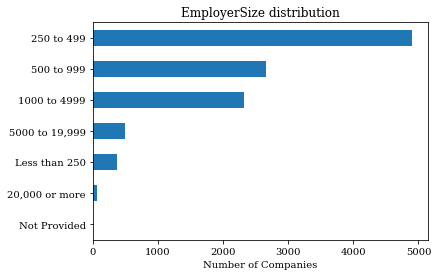

In [7]:
emp_size_dist = df.EmployerSize.value_counts().sort_values()
ax = emp_size_dist.plot.barh(title='EmployerSize distribution')
ax.set_xlabel("Number of Companies")

`EmployerSize` categorical texts will be replaced with the midpoint of the ranges they represent to have numerical. The categorical nature of this column is not affected.

In [8]:
to_replace     = ['Not Provided', 'Less than 250',  '250 to 499',  '500 to 999',
                  '1000 to 4999', '5000 to 19,999', '20,000 or more']
replace_values = [1, 150, 375, 750, 3000, 12500, 40000]
df.EmployerSize = df.EmployerSize.replace(to_replace, replace_values).astype(int)
df.EmployerSize.value_counts().sort_index()

1           9
150       373
375      4896
750      2663
3000     2326
12500     500
40000      61
Name: EmployerSize, dtype: int64

The initial categories (1, 150) and the last categories (12.500, 40.000) draw big differences. Hence, a logarithmic representation is added in order to obtain a linear representation of the sizes.

In [9]:
df['EmployerSizeLog'] = pd.Series(np.log(df.EmployerSize), index=df.index)

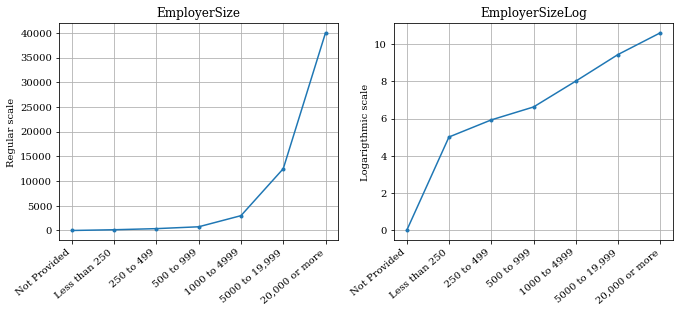

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(11,4))
axs[0].set_title("EmployerSize")
axs[0].set_ylabel("Regular scale")
axs[0].set_xticks(range(8))
axs[0].set_xticklabels(to_replace, rotation=40, ha="right")
axs[0].grid()

axs[0].plot(np.sort(df.EmployerSize.unique()), marker=".")
axs[1].set_title("EmployerSizeLog")
axs[1].set_ylabel("Logarigthmic scale")
axs[1].set_xticks(range(8))
axs[1].set_xticklabels(to_replace, rotation=40, ha="right")
axs[1].grid()
axs[1].plot(range(0,7), np.sort(df.EmployerSizeLog.unique()), marker=".")

**Q1: Payment Balance**
A [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) is suitable to represent how companies are paying their employees based in payment quartiles. Data granularization is required to plot this.

In [11]:
def extract_quartiles_by_gender(gender_str, df):
    raw_cols = ['LowerQuartile', 'LowerMiddleQuartile', 'UpperMiddleQuartile', 'TopQuartile']
    quartile_cols = [gender_str + quartile for quartile in raw_cols]
    quartiles = df[quartile_cols].copy()
    quartiles.loc[:, 'Sex'] = gender_str
    quartiles.rename(columns={
        quartile_cols[0]: "Lower",
        quartile_cols[1]: "LowerMiddle",
        quartile_cols[2]: "UpperMiddle",
        quartile_cols[3]: "Top",
    }, inplace=True)
    return quartiles

In [13]:
male_quartile   = extract_quartiles_by_gender("Male", df)
female_quartile = extract_quartiles_by_gender("Female", df)
full_quartiles  = male_quartile.append(female_quartile)
print(full_quartiles.shape)
full_quartiles.sample(5)

(21656, 5)


,Lower,LowerMiddle,UpperMiddle,Top,Sex
9914,42.0,38.0,46.0,54.0,Male
6344,56.7,59.6,51.2,29.7,Female
4916,57.0,38.0,55.1,39.2,Female
7147,60.0,13.0,7.0,6.0,Female
6128,17.3,22.5,27.2,39.5,Male


In [14]:
melt_quartiles = pd.melt(full_quartiles, id_vars=['Sex'], var_name='Quartile',
    value_vars=['Lower', 'LowerMiddle', 'UpperMiddle', 'Top'],
    value_name='Percentage'
)
print(melt_quartiles.shape)
melt_quartiles.sample(5)

(86624, 3)


,Sex,Quartile,Percentage
25535,Male,LowerMiddle,51.9
39105,Female,LowerMiddle,93.2
32018,Male,LowerMiddle,74.0
61253,Female,UpperMiddle,97.6
52650,Male,UpperMiddle,31.3


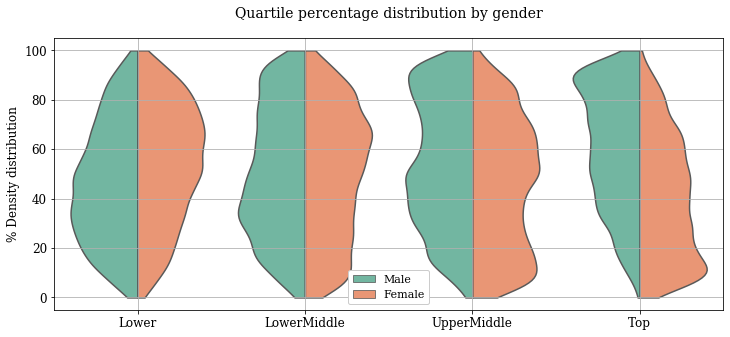

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Quartile percentage distribution by gender", fontsize=14, pad=20)
# sns.despine(left=True, bottom=True)
ax = sns.violinplot(data=melt_quartiles, x="Quartile", y="Percentage", ax=ax, hue="Sex", 
                     cut=0, split=True, inner=None, scale="count", palette="Set2")
plt.tick_params(axis='y', labelsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.grid()
plt.legend(loc='lower center', fontsize=11, framealpha=1)
ax.set_xlabel(None)
ax.set_ylabel('% Density distribution' , fontsize=12)
fig.savefig("plots/quartile-percentage-dist.png", dpi=100)

**Q1 Answer** A balance is found when both curves draw rainbow arcs, meaning that male and female employees are equally present in that payment quartile (smooth mode at 50%). From left to right (also better to worse), the lower quartile is the most balanced one with a slight preference on woman. The greatest imbalance is in the high wage, where men take 80 to 100% of the salaries in the top quartile.

### Data Modelling


### Results Evaluation

### Results Deployment